In [1]:
# Logistic Regression-based Ridge Regression is a combination of two different machine learning techniques:
# Logistic Regression and Ridge Regression. 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
from tqdm import tqdm
import time

In [3]:
# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset file
csv_file = '/kaggle/input/student-mental-health/Student Mental health.csv'
data = pd.read_csv(csv_file)

In [4]:
# View the first 5 rows of the data
print("First 5 Rows of Data:")
print(data.head())

First 5 Rows of Data:
        Timestamp Choose your gender   Age What is your course?  \
0  8/7/2020 12:02             Female  18.0          Engineering   
1  8/7/2020 12:04               Male  21.0    Islamic education   
2  8/7/2020 12:05               Male  19.0                  BIT   
3  8/7/2020 12:06             Female  22.0                 Laws   
4  8/7/2020 12:13               Male  23.0         Mathemathics   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No   
3                     year 3        3.00 - 3.49            Yes   
4                     year 4        3.00 - 3.49             No   

  Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
0                     Yes                   No                       Yes   
1                      No 

In [5]:
# View the shape of the data (rows and columns)
print("\nData Shape (Rows, Columns):")
print(data.shape)


Data Shape (Rows, Columns):
(101, 11)


In [6]:
# Get the column names from the DataFrame
column_names = data.columns.tolist()
print("Column Names:", column_names)

Column Names: ['Timestamp', 'Choose your gender', 'Age', 'What is your course?', 'Your current year of Study', 'What is your CGPA?', 'Marital status', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?']


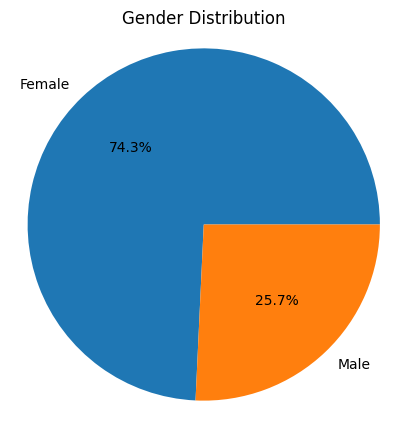

In [7]:
# Plot a pie chart of the gender distribution
gender_counts = data['Choose your gender'].value_counts()
plt.figure(figsize=(5, 5))  # Set the figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

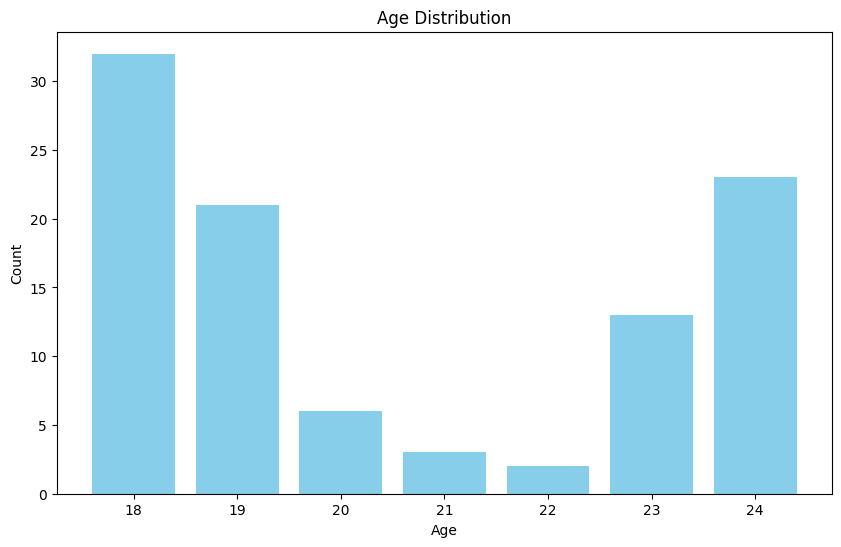

In [8]:
# Plot a bar graph of the age distribution
age_counts = data['Age'].value_counts().sort_index()
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(age_counts.index, age_counts.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

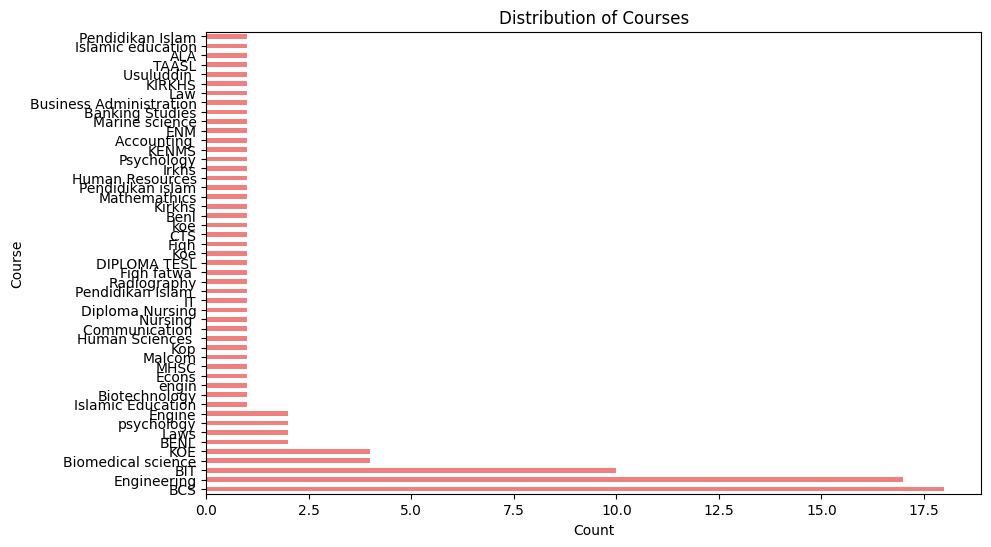

In [9]:
# Plot a horizontal bar graph of the course distribution
course_counts = data['What is your course?'].value_counts()
plt.figure(figsize=(10, 6))  # Set the figure size
course_counts.plot(kind='barh', color='lightcoral')
plt.ylabel('Course')
plt.xlabel('Count')
plt.title('Distribution of Courses')
plt.show()

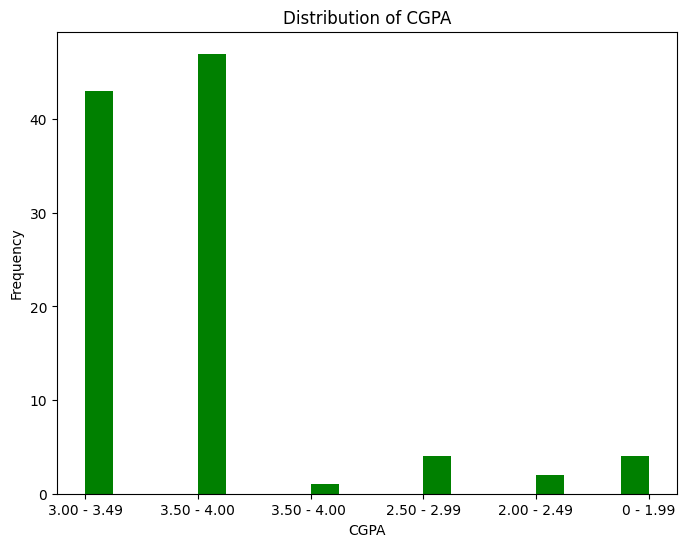

In [10]:
# Plot a histogram for the 'What is your CGPA?' column with a different color
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(data['What is your CGPA?'], bins=20, color='green')  # Specify the number of bins and color
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.title('Distribution of CGPA')
plt.show()

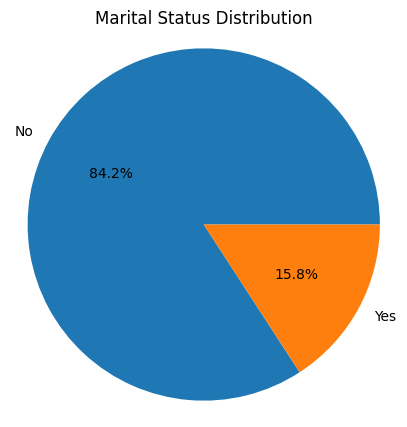

In [11]:
# Count the unique values in the 'Marital status' column
marital_status_counts = data['Marital status'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Marital Status Distribution')
plt.show()

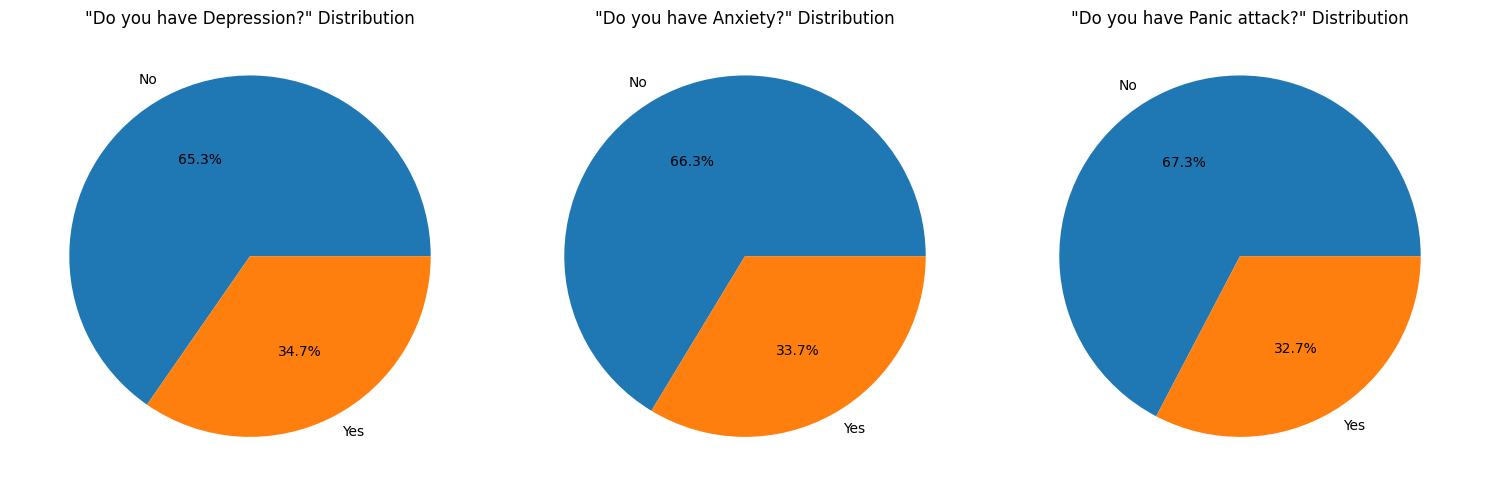

In [12]:
# Define the target variables
target_variables = [
    'Do you have Depression?',
    'Do you have Anxiety?',
    'Do you have Panic attack?'
]

Classes = ['Depression', 'Anxiety', 'Panic attack']

# Create subplots for pie charts
fig, axes = plt.subplots(1, len(target_variables), figsize=(15, 5))

# Iterate through each target variable and create a pie chart
for i, target_variable in enumerate(target_variables):
    # Count the unique values in the target variable column
    target_counts = data[target_variable].value_counts()
    
    # Create a pie chart for the current target variable
    axes[i].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%')
    axes[i].set_title(f'"{target_variable}" Distribution')
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

In [13]:
# Assuming your dataset is stored in a DataFrame called 'df'
nan_rows = data[data.isnull().any(axis=1)]
print(nan_rows)

         Timestamp Choose your gender  Age What is your course?  \
43  8/7/2020 15:07               Male  NaN                  BIT   

   Your current year of Study What is your CGPA? Marital status  \
43                     year 1           0 - 1.99             No   

   Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
43                      No                   No                        No   

   Did you seek any specialist for a treatment?  
43                                           No  


In [14]:
nan_columns = data.columns[data.isnull().any()]
print(nan_columns)

Index(['Age'], dtype='object')


In [15]:
nan_elements = data[data.columns[data.isnull().any()]].isnull()
print(nan_elements)

       Age
0    False
1    False
2    False
3    False
4    False
..     ...
96   False
97   False
98   False
99   False
100  False

[101 rows x 1 columns]


In [16]:
# Remove rows with NaN values in place
data.dropna(inplace=True)

In [17]:
# Define the combined target variable for multi-class classification
# These are the columns you want to predict simultaneously
target_variables = [
    'Do you have Depression?'
#     ,
#     'Do you have Anxiety?'
#     ,
#     'Do you have Panic attack?'
#     ,
#     'Did you seek any specialist for a treatment?'
]

# List of columns that are features
# Exclude the target variables
feature_columns = [
    'Choose your gender',
    'Age',
    'What is your course?',
    'Your current year of Study',
    'What is your CGPA?',
    'Marital status'
]

# Separate the features and labels
X = data[feature_columns]
y = data[target_variables]

In [18]:
# Convert the 'What is your CGPA?' column to numerical values by taking the average of the range
X['What is your CGPA?'] = X['What is your CGPA?'].apply(lambda x: np.mean([float(val.strip()) for val in x.split('-')]))

/tmp/ipykernel_32/1800153101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['What is your CGPA?'] = X['What is your CGPA?'].apply(lambda x: np.mean([float(val.strip()) for val in x.split('-')]))


In [19]:
# ColumnTransformer to apply transformations to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'What is your CGPA?']),
        ('cat', OneHotEncoder(), ['Choose your gender', 'What is your course?', 'Marital status', 'Your current year of Study']),
    ],
    remainder='passthrough'  # Pass through other columns as-is
)

In [20]:
# Apply preprocessing to the features
X = preprocessor.fit_transform(X)

In [21]:
# Split the data into training, validation, and test sets
# First, split into training and combined validation-test
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.4, random_state=42)

# Second, split the combined validation-test set into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=42)

# Now, you have X_train, y_train for training, X_val, y_val for validation, and X_test, y_test for testing.

In [22]:
# Initialize Logistic Regression with L1 regularization
lasso_regression = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr')

In [23]:
# Define the number of training epochs
epochs = 5  # Adjust as needed

# Lists to collect accuracy and log loss values
train_accuracy_values = []
val_accuracy_values = []
train_log_loss_values = []
val_log_loss_values = []
train_times = []
val_times = []

# Create a loop with tqdm to display the progress
for epoch in tqdm(range(epochs), desc="Epoch Progress"):
    # Training
    start_time = time.time()
    lasso_regression.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_times.append(train_time)
    
    y_train_pred = lasso_regression.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_log_loss = log_loss(y_train, lasso_regression.predict_proba(X_train))
    train_accuracy_values.append(train_accuracy)
    train_log_loss_values.append(train_log_loss)
    
    # Validation
    start_time = time.time()
    y_val_pred = lasso_regression.predict(X_val)
    val_time = (time.time() - start_time) * 1000  # Convert to milliseconds
    val_times.append(val_time)
    
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_log_loss = log_loss(y_val, lasso_regression.predict_proba(X_val))
    val_accuracy_values.append(val_accuracy)
    val_log_loss_values.append(val_log_loss)


Epoch Progress:   0%|          | 0/5 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

In [24]:
# Display Training and Validation Times, Accuracy, and Log Loss
for epoch, (train_time, val_time, train_acc, val_acc, train_loss, val_loss) in enumerate(zip(train_times, val_times, train_accuracy_values, val_accuracy_values, train_log_loss_values, val_log_loss_values)):
    print(f"Epoch {epoch + 1}:")
    print(f"Train_Accuracy: {train_acc:.4f}, Train_Loss: {train_loss:.4f}, Train_Time: {train_time:.2f} seconds")
    print(f"Val_Accuracy: {val_acc:.4f}, Val_Loss: {val_loss:.4f}, Val_Time: {val_time:.2f} milliseconds")
    print()

Epoch 1:
Train_Accuracy: 0.8667, Train_Loss: 0.3839, Train_Time: 0.01 seconds
Val_Accuracy: 0.8000, Val_Loss: 0.4976, Val_Time: 0.19 milliseconds

Epoch 2:
Train_Accuracy: 0.8333, Train_Loss: 0.3839, Train_Time: 0.00 seconds
Val_Accuracy: 0.8000, Val_Loss: 0.4976, Val_Time: 0.18 milliseconds

Epoch 3:
Train_Accuracy: 0.8333, Train_Loss: 0.3839, Train_Time: 0.00 seconds
Val_Accuracy: 0.8000, Val_Loss: 0.4976, Val_Time: 0.16 milliseconds

Epoch 4:
Train_Accuracy: 0.8333, Train_Loss: 0.3839, Train_Time: 0.00 seconds
Val_Accuracy: 0.8000, Val_Loss: 0.4976, Val_Time: 0.17 milliseconds

Epoch 5:
Train_Accuracy: 0.8667, Train_Loss: 0.3839, Train_Time: 0.00 seconds
Val_Accuracy: 0.8000, Val_Loss: 0.4975, Val_Time: 0.18 milliseconds



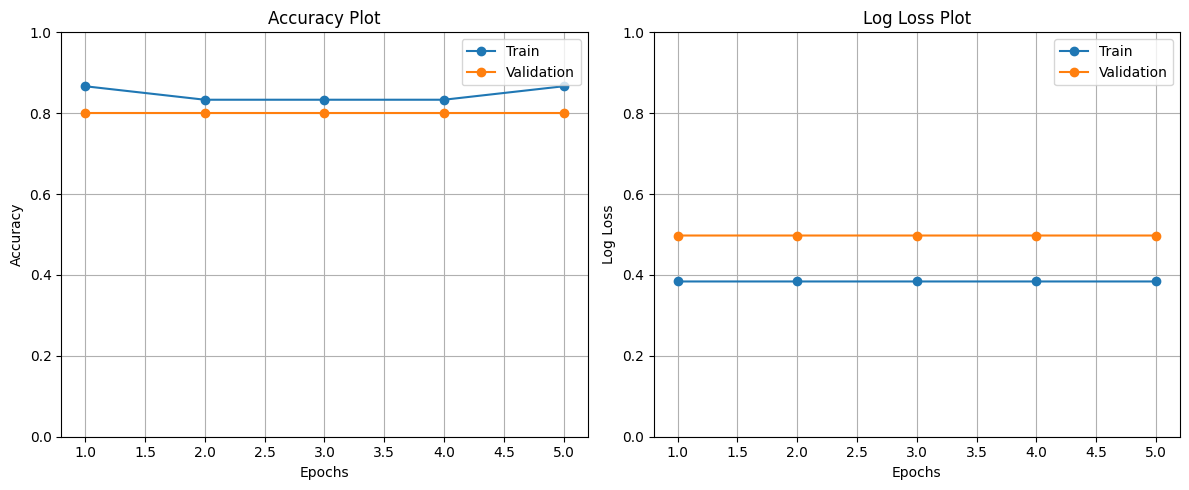

In [25]:
# Plot the results
plt.figure(figsize=(12, 5))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_accuracy_values, marker='o', linestyle='-', label='Train')
plt.plot(range(1, epochs + 1), val_accuracy_values, marker='o', linestyle='-', label='Validation')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()

# Plot Training and Validation Log Loss
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_log_loss_values, marker='o', linestyle='-', label='Train')
plt.plot(range(1, epochs + 1), val_log_loss_values, marker='o', linestyle='-', label='Validation')
plt.title('Log Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

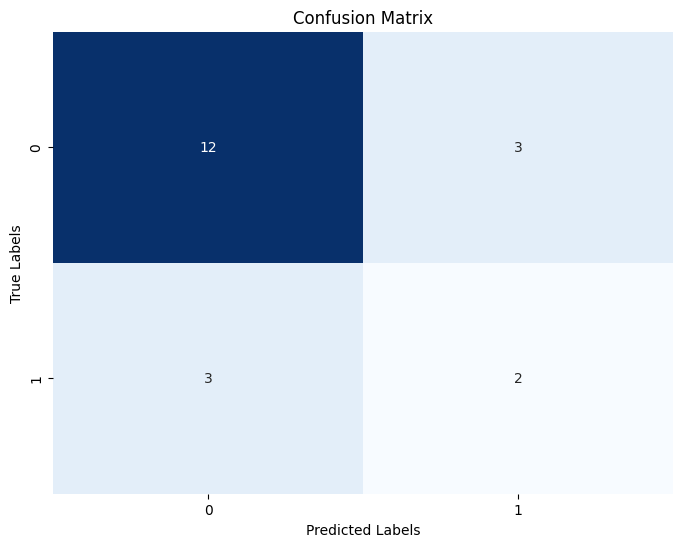

In [26]:
# Compute the confusion matrix for the final trained model
y_test_pred = lasso_regression.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Generate a classification report for the final trained model
classification_rep = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

          No       0.80      0.80      0.80        15
         Yes       0.40      0.40      0.40         5

    accuracy                           0.70        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.70      0.70      0.70        20

